### Web scraping and Data Analysis

##### Life Cycle of the Data Science Project:

*  1) Business Understanding (Understand the Business functionalities beofore we go furthur)
*  2) Data Requirement (Should know important variables)
*  3) Data Collection(We Use Web Scraping)
*  4) Data Cleaning ( Missing Data, Pre processing) 
*  5) Data Analysis (EDA) to know insight about data 
*  6) Model Building (Apply ML Models)
*  7) Model Evaluation (Verify Model performance) 
*  8) Deployment (Deploy the best model) 


* Web scraping is an automated task to extract large amounts of data from wb pages

**Steps involved:**
* Identify the URL from which you need the data.
* Inspect the HTML code behind the page.
* Find the elements you want to extract.
* Write the code the store the data in the required format.

**Python libraries used:**
* requests: This is used to extract the HTML code from the given URL.
* BeautifulSoup: This is used to format and read the HTML content.
* re
* Numpy, Pandas, matplotlib, Seaborn etc..,

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
URL ='https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [3]:
page = requests.get(URL)

In [4]:
page.status_code

200

In [5]:
# get the HTML content from the page
pagecontent = page.text

In [6]:
pagecontent

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/><link href="https://img1a.flixcart.com" rel="dns-prefetch"/><link rel="stylesheet" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.e0eee8.css"/><link rel="preload" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_f64bb3.png" as="image"><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" si

In [7]:
soup = BeautifulSoup(pagecontent)

In [8]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/><link href="https://img1a.flixcart.com" rel="dns-prefetch"/><link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.e0eee8.css" rel="stylesheet"/><link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_f64bb3.png" rel="preload"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-

In [9]:
soup.find_all('div', attrs={'class':'_2rQ-NK'})# find all page elements that match the given criteria

[]

In [10]:
soup.find('div', attrs={'class':'_2rQ-NK'}) # find first page elements that match tje given criteria

In [11]:

soup.find_all('div', attrs={'class':'_3wU53n'})# find all page elements that match the given criteria

[]

In [12]:
for x in soup.find_all('div', attrs={'class':'_2rQ-NK'}) : 
    print(x.text)

In [13]:
for x in soup.find_all('div', attrs={'class':'hGSR34'}) : 
    print(x.text)

In [14]:
productname = [] 
price = []
rating = []
features = []
pagenum = []

for i in range(1,25): # go throught the 23 pages
    start_time = time.time()
    URL = 'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'_1-2Iqu row'}): # get 24 product properties in each page
        pname = x.find('div', attrs = {'class':'_3wU53n'})
        cost = x.find('div', attrs = {'class':'_2rQ-NK'})
        rat = x.find('div', attrs = {'class':'hGSR34'})
        specs = x.find('ul', attrs = {'class':'vFw0gD'})
        
        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)
            
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
            
        if rat is None:
            rating.append(np.NaN)
        else:
            rating.append(rat.text)
            
        if specs is None:
            features.append(np.NaN)
        else:
            features.append(specs.text)
            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))

Page 1 completed in 2.222787618637085 seconds
Page 2 completed in 1.8386154174804688 seconds
Page 3 completed in 1.3491182327270508 seconds
Page 4 completed in 1.455479621887207 seconds
Page 5 completed in 2.0030906200408936 seconds
Page 6 completed in 1.5806429386138916 seconds
Page 7 completed in 1.0953614711761475 seconds
Page 8 completed in 2.035785436630249 seconds
Page 9 completed in 1.7080321311950684 seconds
Page 10 completed in 1.6093664169311523 seconds
Page 11 completed in 1.5110442638397217 seconds
Page 12 completed in 1.683098554611206 seconds
Page 13 completed in 1.3709957599639893 seconds
Page 14 completed in 2.0854406356811523 seconds
Page 15 completed in 1.944202184677124 seconds
Page 16 completed in 1.3456604480743408 seconds
Page 17 completed in 2.4630227088928223 seconds
Page 18 completed in 2.3133487701416016 seconds
Page 19 completed in 1.5268771648406982 seconds
Page 20 completed in 10.930375814437866 seconds
Page 21 completed in 1.3046977519989014 seconds
Page 2

In [16]:
len(productname)
len(price)
len(rating)
len(features)
len(pagenum)

0

0

0

0

0

In [143]:
laptop_df = pd.DataFrame({'ProductName':productname, 'Price':price, 'Rating': rating, 'Features':features, 'PageNo': pagenum})

In [144]:
laptop_df

,ProductName,Price,Rating,Features,PageNo
0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1
1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1
2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1
3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1
4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1
...,...,...,...,...,...
547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,"₹44,097",4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24
548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,"₹35,811",4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24
549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24
550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,"₹64,990",4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24


##### Save the Data in a CSV File

In [145]:
# Save df to csv

laptop_df.to_csv(r'.\LaptopData.csv')

In [17]:
laptop_df=pd.read_csv(("./LaptopData.csv"))

In [146]:
laptop_df.head()

,ProductName,Price,Rating,Features,PageNo
0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1
1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1
2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1
3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1
4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1


##### Extracting Features - Processor, RAM, Storage, Screen size and cleaning other data

In [19]:
# Extract ProcessorName

regex = r'^\w+'

laptop_df['ProcessorName'] = laptop_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [20]:
laptop_df.head()

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,[Intel]
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,[Intel]
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,[Intel]
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,[Intel]
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,[Intel]


In [22]:
# laptop_df["ProcessorName"].value_counts()

In [23]:
# Extract Processor Details

regex = r'[AMD|Intel|][\sA-Za-z0-9]+Processor'

laptop_df['ProcessorDetails'] = laptop_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [24]:
laptop_df.head()

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,[Intel],[Intel Core i7 Processor]
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,[Intel],[Intel Core i7 Processor]
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,[Intel],[Intel Pentium Gold Processor]
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,[Intel],[Intel Core i5 Processor]
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,[Intel],[Intel Core i5 Processor]


In [25]:
# Extracting RAM

regex = r'[0-9][\sA-Za-z0-9]+RAM'

laptop_df['RAM'] = laptop_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [27]:
laptop_df['Features'][0]

'Intel Core i7 Processor (10th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) DisplayMatrix Display, Dragon Center, Cooler Boost 5, True Color 2.0, Nahimic 32 Year Warranty'

In [26]:
laptop_df.head()

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,[Intel],[Intel Core i7 Processor],[16 GB DDR4 RAM]
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,[Intel],[Intel Core i7 Processor],[8 GB DDR4 RAM]
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,[Intel],[Intel Pentium Gold Processor],[4 GB DDR4 RAM]
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,[Intel],[Intel Core i5 Processor],[4 GB DDR4 RAM]
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,[Intel],[Intel Core i5 Processor],[8 GB DDR3 RAM]


In [28]:
# Storage

regex = r'[0-9\s]+(?:GB|TB)\s(?:HDD|SSD)'

laptop_df['Storage'] = laptop_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [29]:
laptop_df

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,[Intel],[Intel Core i7 Processor],[16 GB DDR4 RAM],"[1 TB HDD, 256 GB SSD]"
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,[Intel],[Intel Core i7 Processor],[8 GB DDR4 RAM],[512 GB SSD]
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,[Intel],[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[1 TB HDD]
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,[Intel],[Intel Core i5 Processor],[4 GB DDR4 RAM],[512 GB SSD]
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,[Intel],[Intel Core i5 Processor],[8 GB DDR3 RAM],[128 GB SSD]
...,...,...,...,...,...,...,...,...,...,...
547,547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,"₹44,097",4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[1 TB HDD]
548,548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,"₹35,811",4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24,[Intel],[Intel Core i3 Processor],[8 GB DDR4 RAM],[256 GB SSD]
549,549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24,[Intel],[Intel Core i7 Processor],[8 GB DDR4 RAM],[512 GB SSD]
550,550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,"₹64,990",4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[1 TB HDD]


In [42]:
# Screen Size

regex = r'[0-9.\s]+(?:cm|inch)'

laptop_df['Scrren_Size'] = laptop_df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [43]:
laptop_df.head()

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Brand,Scrren_Size
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,Acer,"[35.56 cm, 14 inch]"
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,HP,"[39.62 cm, 15.6 inch]"
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,Apple,"[33.78 cm, 13.3 inch]"


In [44]:
# Brand

regex = r'^\w+'

laptop_df['Brand'] = laptop_df['ProductName'].apply(lambda x:re.compile(regex).findall(x))

In [45]:
laptop_df

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Brand,Scrren_Size
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,[MSI],"[39.62 cm, 15.6 inch]"
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,[MSI],"[39.62 cm, 15.6 inch]"
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,[Acer],"[35.56 cm, 14 inch]"
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,[HP],"[39.62 cm, 15.6 inch]"
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,[Apple],"[33.78 cm, 13.3 inch]"
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,"₹44,097",4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,[HP],"[35.56 cm, 14 inch]"
548,548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,"₹35,811",4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,[HP],"[35.56 cm, 14 inch]"
549,549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,[MSI],"[39.62 cm, 15.6 inch]"
550,550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,"₹64,990",4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,[HP],"[39.62 cm, 15.6 inch]"


In [46]:
laptop_df.columns

Index(['Unnamed: 0', 'ProductName', 'Price', 'Rating', 'Features', 'PageNo',
       'ProcessorName', 'ProcessorDetails', 'RAM', 'Storage', 'Brand',
       'Scrren_Size'],
      dtype='object')

In [47]:
laptop_df['Storage'][0]

'1 TB HDD256 GB SSD'

In [39]:
''.join(x)



'1 TB HDD256 GB SSD'

In [48]:
laptop_df['ProcessorName'] = laptop_df['ProcessorName'].apply(lambda x:''.join(x))
laptop_df['ProcessorDetails'] = laptop_df['ProcessorDetails'].apply(lambda x:''.join(x))
laptop_df['RAM'] = laptop_df['RAM'].apply(lambda x:''.join(x))
laptop_df['Storage'] = laptop_df['Storage'].apply(lambda x:''.join(x))
laptop_df['Brand'] =laptop_df['Brand'].apply(lambda x:''.join(x))
#laptop_df['Scrren_Size'] =laptop_df['Scrren_Size'].apply(lambda x:''.join(x))

In [49]:
laptop_df

,Unnamed: 0,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Brand,Scrren_Size
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,Acer,"[35.56 cm, 14 inch]"
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,HP,"[39.62 cm, 15.6 inch]"
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,Apple,"[33.78 cm, 13.3 inch]"
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,"₹44,097",4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,HP,"[35.56 cm, 14 inch]"
548,548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,"₹35,811",4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,HP,"[35.56 cm, 14 inch]"
549,549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
550,550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,"₹64,990",4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,HP,"[39.62 cm, 15.6 inch]"


In [163]:
laptop_df['ScreenSize_cm'] = laptop_df['Scrren_Size'].apply(lambda x:x[0])
laptop_df['ScreenSize_inch']  = laptop_df['Scrren_Size'].apply(lambda x:x[1])

In [164]:
laptop_df

,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Scrren_Size,Brand,ScreenSize_cm,ScreenSize_inch
0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,"₹1,19,990",4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,"[39.62 cm, 15.6 inch]",MSI,39.62 cm,15.6 inch
1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,"[39.62 cm, 15.6 inch]",MSI,39.62 cm,15.6 inch
2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,"₹23,990",4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,"[35.56 cm, 14 inch]",Acer,35.56 cm,14 inch
3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,"₹49,990",4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,"[39.62 cm, 15.6 inch]",HP,39.62 cm,15.6 inch
4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,"₹67,990",4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,"[33.78 cm, 13.3 inch]",Apple,33.78 cm,13.3 inch
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,"₹44,097",4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,"[35.56 cm, 14 inch]",HP,35.56 cm,14 inch
548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,"₹35,811",4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,"[35.56 cm, 14 inch]",HP,35.56 cm,14 inch
549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,"₹66,990",4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,"[39.62 cm, 15.6 inch]",MSI,39.62 cm,15.6 inch
550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,"₹64,990",4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,"[39.62 cm, 15.6 inch]",HP,39.62 cm,15.6 inch


In [165]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       552 non-null    object
 1   Price             552 non-null    object
 2   Rating            415 non-null    object
 3   Features          552 non-null    object
 4   PageNo            552 non-null    int64 
 5   ProcessorName     552 non-null    object
 6   ProcessorDetails  552 non-null    object
 7   RAM               552 non-null    object
 8   Storage           552 non-null    object
 9   Scrren_Size       552 non-null    object
 10  Brand             552 non-null    object
 11  ScreenSize_cm     552 non-null    object
 12  ScreenSize_inch   552 non-null    object
dtypes: int64(1), object(12)
memory usage: 56.2+ KB


In [50]:
laptop_df.Price[0]

'₹1,19,990'

In [51]:

float(laptop_df.Price[0].replace('₹','').replace(',',''))

119990.0

In [52]:
laptop_df['Price'] = laptop_df['Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [58]:
laptop_df.rename(columns={'Unnamed: 0':'S.NO'})

,S.NO,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Brand,Scrren_Size
0,0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,119990.0,4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
1,1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,66990.0,4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
2,2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,23990.0,4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,Acer,"[35.56 cm, 14 inch]"
3,3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,49990.0,4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,HP,"[39.62 cm, 15.6 inch]"
4,4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,67990.0,4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,Apple,"[33.78 cm, 13.3 inch]"
...,...,...,...,...,...,...,...,...,...,...,...,...
547,547,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,44097.0,4.2,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,HP,"[35.56 cm, 14 inch]"
548,548,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,35811.0,4.3,Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,HP,"[35.56 cm, 14 inch]"
549,549,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,66990.0,4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,MSI,"[39.62 cm, 15.6 inch]"
550,550,HP Pavilion 15-CS Core i5 8th Gen - (8 GB/1 TB...,64990.0,4.3,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...,24,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,1 TB HDD,HP,"[39.62 cm, 15.6 inch]"


In [168]:
laptop_df.


,ProductName,Price,Rating,Features,PageNo,ProcessorName,ProcessorDetails,RAM,Storage,Scrren_Size,Brand,ScreenSize_cm,ScreenSize_inch
0,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,119990.0,4.5,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,1,Intel,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB HDD256 GB SSD,"[39.62 cm, 15.6 inch]",MSI,39.62 cm,15.6 inch
1,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,66990.0,4.5,Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...,1,Intel,Intel Core i7 Processor,8 GB DDR4 RAM,512 GB SSD,"[39.62 cm, 15.6 inch]",MSI,39.62 cm,15.6 inch
2,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,23990.0,4.1,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,1 TB HDD,"[35.56 cm, 14 inch]",Acer,35.56 cm,14 inch
3,HP 15s Core i5 10th Gen - (4 GB + 32 GB Optane...,49990.0,4.2,Intel Core i5 Processor (10th Gen)4 GB DDR4 RA...,1,Intel,Intel Core i5 Processor,4 GB DDR4 RAM,512 GB SSD,"[39.62 cm, 15.6 inch]",HP,39.62 cm,15.6 inch
4,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,67990.0,4.7,Intel Core i5 Processor (5th Gen)8 GB DDR3 RAM...,1,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,128 GB SSD,"[33.78 cm, 13.3 inch]",Apple,33.78 cm,13.3 inch


##### Data Visualizations

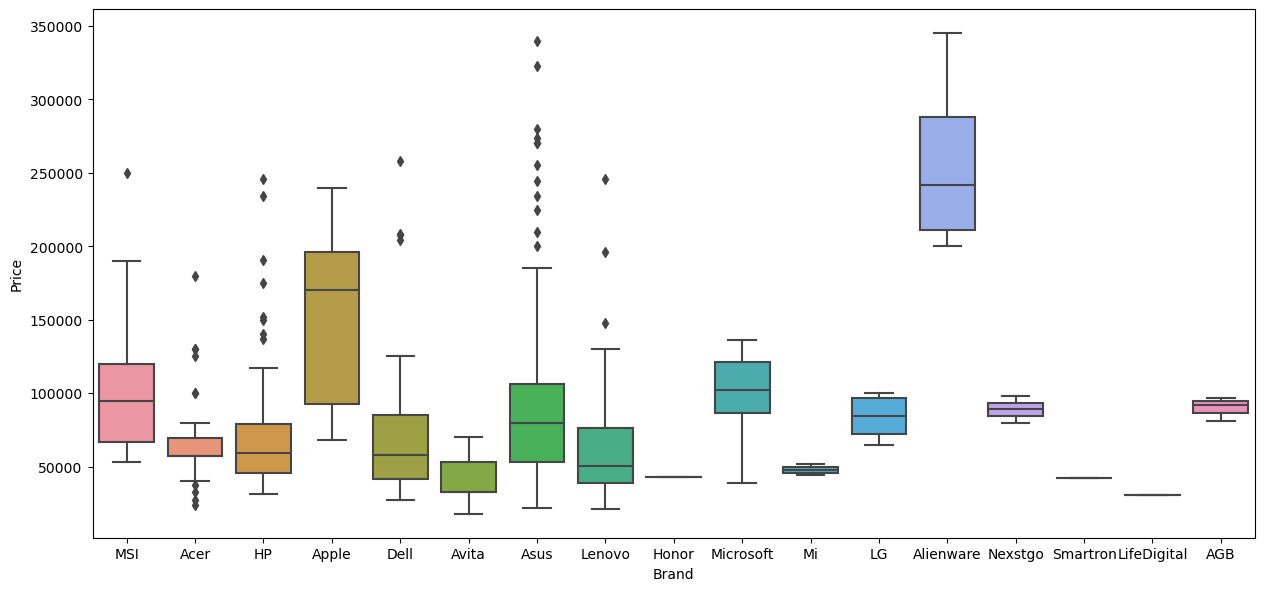

In [169]:
plt.figure(dpi = 100, figsize=(15,7))
sns.boxplot(x = laptop_df.Brand, y = laptop_df.Price);

##### Checking the Distribution of the Price Columns

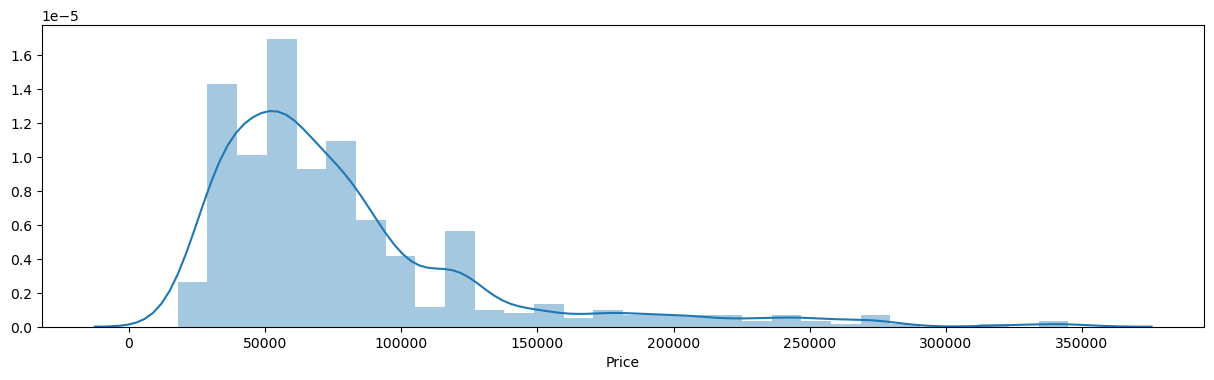

In [170]:
plt.figure(dpi = 100, figsize=(15,4))
sns.distplot(laptop_df.Price);

<Figure size 1500x400 with 0 Axes>

(array([163., 224.,  70.,  45.,  17.,  12.,  10.,   7.,   1.,   3.]),
 array([ 17990.,  50690.,  83390., 116090., 148790., 181490., 214190.,
        246890., 279590., 312290., 344990.]),
 <a list of 10 Patch objects>)

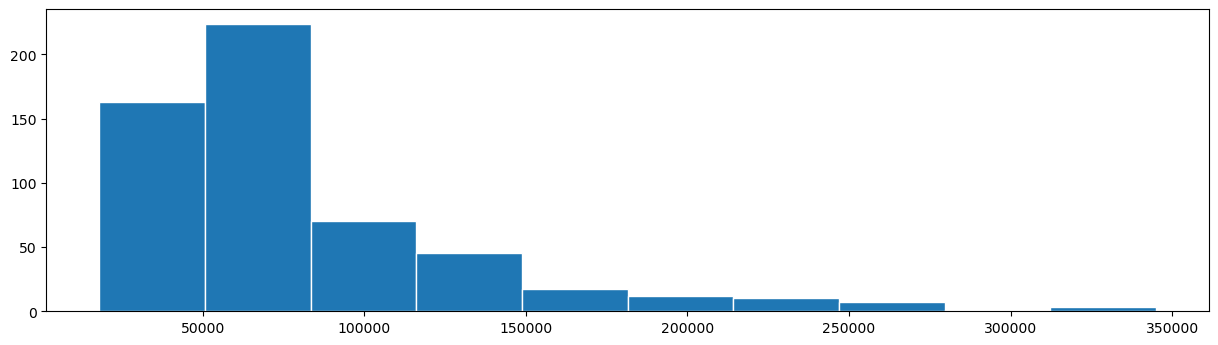

In [171]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(laptop_df.Price, edgecolor = 'w')

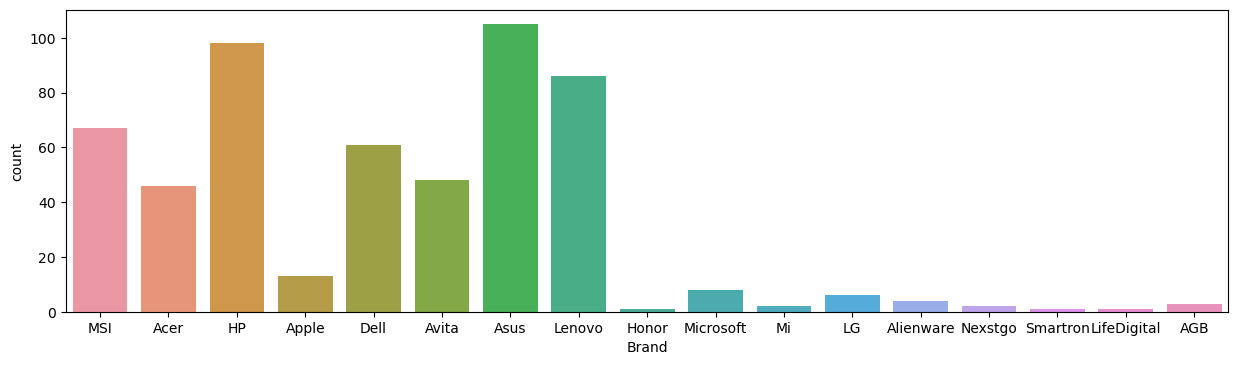

In [172]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(laptop_df.Brand);

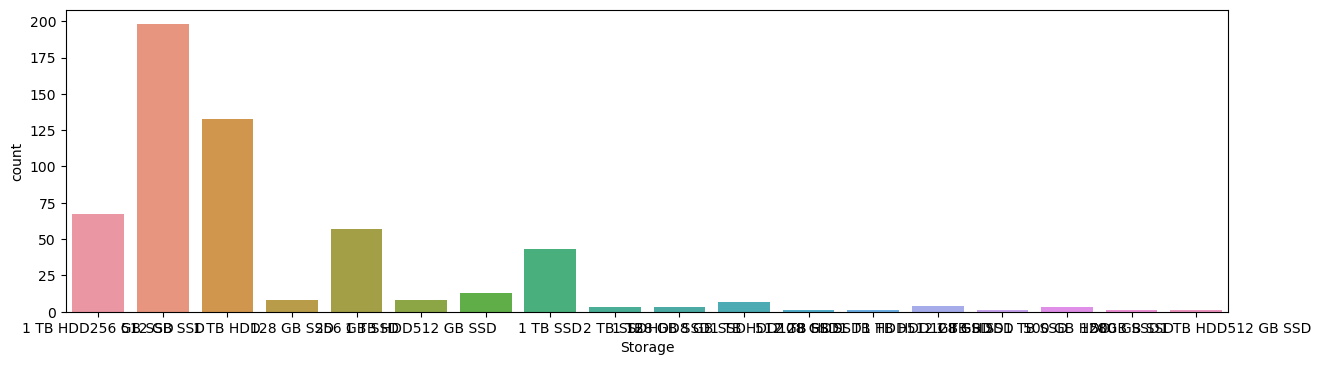

In [173]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(laptop_df.Storage);

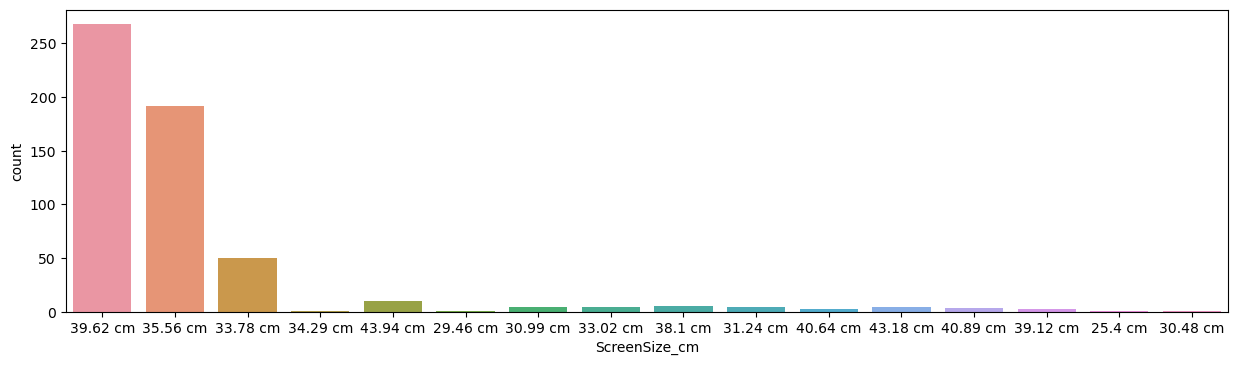

In [174]:
plt.figure(dpi = 100, figsize=(15,4))
sns.countplot(laptop_df.ScreenSize_cm);

##### Get the Minimum maximum aand Mean Price of each Brand

In [175]:
laptop_df.groupby(['Brand'], as_index=False).agg({'Price':['min', 'max', 'mean']})

Brand     Price                         
                      min       max           mean
0           AGB   81000.0   96999.0   89999.333333
1          Acer   23990.0  179990.0   65824.891304
2     Alienware  199990.0  344990.0  257190.000000
3         Apple   67990.0  239990.0  152955.538462
4          Asus   21730.0  339990.0   97285.961905
5         Avita   17990.0   69990.0   40236.958333
6          Dell   27415.0  257865.0   70392.803279
7            HP   31495.0  245999.0   70863.377551
8         Honor   42990.0   42990.0   42990.000000
9            LG   64490.0   99990.0   83669.000000
10       Lenovo   20990.0  245990.0   61682.162791
11  LifeDigital   30679.0   30679.0   30679.000000
12          MSI   52990.0  249990.0  101292.492537
13           Mi   43999.0   51999.0   47999.000000
14    Microsoft   38599.0  135990.0   98067.250000
15      Nexstgo   79990.0   97990.0   88990.000000
16     Smartron   42490.0   42490.0   42490.000000

#### Visualize the Maximun Price from Each Brand

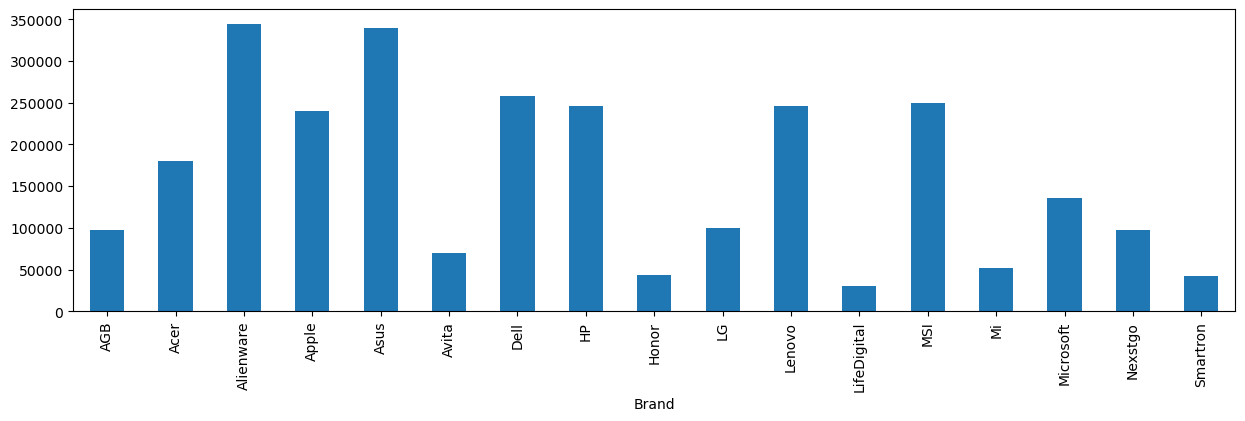

In [176]:
plt.figure(dpi = 100, figsize=(15,4))
laptop_df.groupby(['Brand'])['Price'].max().plot(kind = 'bar');

##### Visualize the Minimum Price from each Brand

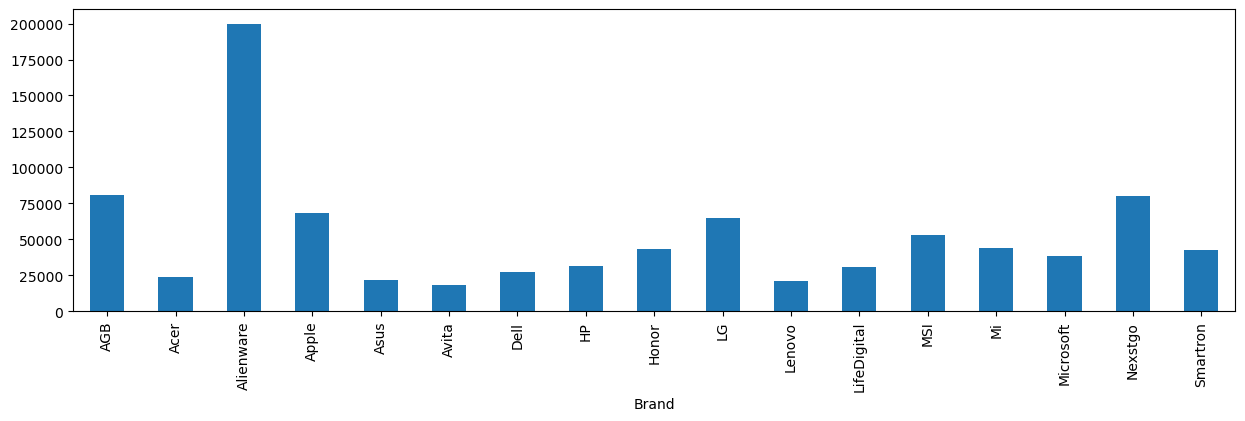

In [177]:
plt.figure(dpi = 100, figsize=(15,4))
laptop_df.groupby(['Brand'])['Price'].min().plot(kind = 'bar');